#### Import libraries

In [2]:
%matplotlib inline
import imageio
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [3]:
img_matrix = imageio.imread('images/fotografo.jpg')

img = Image.fromarray(img_matrix, 'L')
#img.show()

#### Simple convolution (slow)

In [4]:
def filter_simple(source, kernel, mask_rows, mask_cols):

    padding_rows = int((mask_rows - 1) / 2)
    padding_cols = int((mask_cols - 1) / 2)

    rows, cols = source.shape

    padded = np.zeros((rows + 2 * padding_rows, cols + 2 * padding_cols), dtype=np.uint8)
    padded[padding_rows:padding_rows + rows, padding_cols:padding_cols + cols] = source

    result = np.zeros((rows + 2 * padding_rows, cols + 2 * padding_cols), dtype=np.uint8)

    for i in range(padding_rows, padding_rows + rows - 1):
        for j in range(padding_cols, padding_cols + cols - 1):
            aux = padded[i - padding_rows:i + padding_rows + 1, j - padding_cols: j + padding_cols + 1]
            out_value = 0
            for x in range(mask_rows):
                for y in range(mask_cols):
                    out_value = out_value + (aux[x,y] * kernel[x,y]) / np.sum(kernel)
            result[i, j] = out_value

    result = result[padding_rows:padding_rows + rows, padding_cols: padding_cols + cols]

    return result

In [ ]:
kernel_bblur = np.matrix([[1,1,1],[1,1,1],[1,1,1]])
kernel_gblur5 = np.matrix([[1,4,6,4,1],[4,16,24,16,4],[6,24,36,24,6],[4,16,24,16,4],[1,4,6,4,1]])
kernel_edge = np.matrix([[-1,-1,-1],[-1,9,-1],[-1,-1,-1]])
kernel_sharp = np.matrix([[0,-1,0],[-1,5,-1],[0,-1,0]])

image_new = filter_simple(img_matrix,kernel_bblur, 3, 3)
image_new = filter_simple(image_new,kernel_bblur, 3, 3)
image_new = filter_simple(image_new,kernel_bblur, 3, 3)
image_new = filter_simple(image_new,kernel_bblur, 3, 3)

# image_new = filter_simple(image_new,kernel_sharp, 3, 3)
# image_new = filter_simple(image_new,kernel_sharp, 3, 3)
# image_new = filter_simple(image_new,kernel_sharp, 3, 3)

image_new = filter_simple(image_new,kernel_edge, 3, 3)

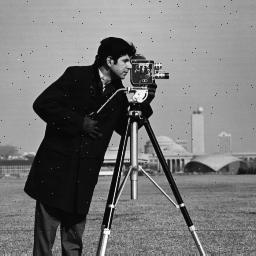

In [6]:
img

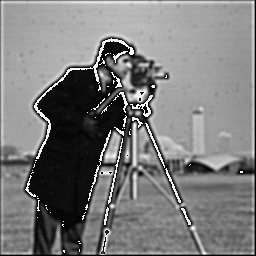

In [7]:
img_new = Image.fromarray(image_new, 'L')
img_new